In [1]:
import utilities
import os
import csv
import pandas as pd
from prettytable import PrettyTable
from prettytable import ALL as ALL

In [16]:
df = pd.read_csv("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/report_unique_0307.csv")
dict_fqdn = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/dict_fqdns_0307.json")
subgrouped_skills = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/skills_data/subgrouped_skills.json")

## Distribution of Domains' purpose on each categorty

In [3]:
df_third = df[df['Party'] == 'Third-Party']

In [4]:
skill_purpose = {}
for index, row in df_third.iterrows():
    if row['Skill Categories'] not in skill_purpose:
        skill_purpose[row['Skill Categories']] = {'Advertising/Tracking' : 0, 'Function' : 0}
        skill_purpose[row['Skill Categories']][row['Purpose']] = 1
    else:
        skill_purpose[row['Skill Categories']][row['Purpose']] += 1

In [5]:
table = PrettyTable(['Skill Category', 'No. Advertising/Tracking 3rd-Party Domains', 'No. Functional 3rd-Party Domains'], hrules=ALL)

for cat in skill_purpose:   
    table.add_row([cat, skill_purpose[cat]['Advertising/Tracking'], skill_purpose[cat]['Function']])
print(table)

+----------------+--------------------------------------------+----------------------------------+
| Skill Category | No. Advertising/Tracking 3rd-Party Domains | No. Functional 3rd-Party Domains |
+----------------+--------------------------------------------+----------------------------------+
| Fashion Style  |                     9                      |                4                 |
+----------------+--------------------------------------------+----------------------------------+
| Connected Car  |                     7                      |                0                 |
+----------------+--------------------------------------------+----------------------------------+
|      Pets      |                     3                      |                11                |
+----------------+--------------------------------------------+----------------------------------+
|  Sprituality   |                     3                      |                8                 |
+---------

In [24]:
df_3p_ad = df_third[df_third['Purpose'] == 'Advertising/Tracking']
df_3p_ad[['Skill Categories', 'skill_name', 'FQDN']]

table = PrettyTable(['Skill Categories', 'skill_name', 'FQDNs', 'Customer rating'], hrules=ALL)

for index, row in df_3p_ad.iterrows():
    category = row['Skill Categories']
    if category == 'Fashion Style':
        category = 'Fashion-Style'
    if category == 'Connected Car':
        category = 'ConnectedCar'
    if category == 'Pets':
        category = 'Pets-Animals'
        
    skill_name = row['skill_name']

    table.add_row([category, skill_name, row['FQDN'], subgrouped_skills[category][skill_name]["Total_customer_that_rate_the_skill"]])
print(table)

KeyError: 'Sprituality'

In [7]:
a = pd.DataFrame(df[['Party', 'Purpose']].groupby(['Party', 'Purpose']).size(), columns={'0': '#skills'})
a

0
Party          Purpose                   
First-Party    Function                 5
Platform-based Advertising/Tracking   143
               Function              1607
Third-Party    Advertising/Tracking    27
               Function                25

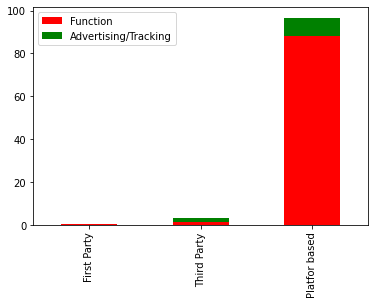

In [15]:
ads = [0, 1.68,8.62]
func = [0.31, 1.36,88]
party = ['First Party', 'Third Party', 'Platfor based']
df_plot = pd.DataFrame({'Function': func, 'Advertising/Tracking': ads}, index=party)
ax = df_plot.plot.bar(stacked=True, color={"Function": "red", "Advertising/Tracking": "green"})

In [9]:
df_fqdn = df.loc[df['Party'] == 'Platform-based', 'FQDN']
platform_base = {}
for fqdn in df_fqdn:
    if fqdn not in platform_base:
        platform_base[fqdn] = 1
    else:
        platform_base[fqdn] += 1
fqdn_skill_num_sorted = dict(sorted(platform_base.items(), key=lambda kv: kv[1], reverse=True))

In [43]:

table = PrettyTable(['FQDN', 'No. Skills', 'Purpose'], hrules=ALL)

for fqdn in fqdn_skill_num_sorted:   
    table.add_row([fqdn, fqdn_skill_num_sorted[fqdn], dict_fqdns[fqdn]['ATSes']])
print(table)

+-------------------------------------------------+------------+----------------------+
|                       FQDN                      | No. Skills |       Purpose        |
+-------------------------------------------------+------------+----------------------+
|            avs-alexa-14-na.amazon.com           |    446     |       Function       |
+-------------------------------------------------+------------+----------------------+
|                 mlis.amazon.com                 |    377     |       Function       |
+-------------------------------------------------+------------+----------------------+
|              prod.amcs-tachyon.com              |    305     |       Function       |
+-------------------------------------------------+------------+----------------------+
|               api.amazonalexa.com               |    173     |       Function       |
+-------------------------------------------------+------------+----------------------+
|          d3p8zr0ffa9t17.cloudf

In [38]:
df_fqdn = df.loc[df['Party'] == 'Third-Party', 'FQDN']
platform_base = {}
for fqdn in df_fqdn:
    if fqdn not in platform_base:
        platform_base[fqdn] = 1
    else:
        platform_base[fqdn] += 1
fqdn_skill_num_sorted = dict(sorted(platform_base.items(), key=lambda kv: kv[1], reverse=True))

In [39]:
table = PrettyTable(['FQDN', 'No. Skills', 'Purpose'], hrules=ALL)

for fqdn in fqdn_skill_num_sorted:   
    table.add_row([fqdn, fqdn_skill_num_sorted[fqdn], dict_fqdns[fqdn]['ATSes']])
print(table)

+-----------------------------------------+------------+----------------------+
|                   FQDN                  | No. Skills |       Purpose        |
+-----------------------------------------+------------+----------------------+
|              dillilabs.com              |     9      |       Function       |
+-----------------------------------------+------------+----------------------+
|            cdn2.voiceapps.com           |     7      |       Function       |
+-----------------------------------------+------------+----------------------+
|             play.podtrac.com            |     6      | Advertising/Tracking |
+-----------------------------------------+------------+----------------------+
|           traffic.megaphone.fm          |     6      | Advertising/Tracking |
+-----------------------------------------+------------+----------------------+
|             dcs.megaphone.fm            |     3      | Advertising/Tracking |
+---------------------------------------

In [45]:
df_fqdn = df.loc[df['Party'] == 'First-Party', 'FQDN']
platform_base = {}
for fqdn in df_fqdn:
    if fqdn not in platform_base:
        platform_base[fqdn] = 1
    else:
        platform_base[fqdn] += 1
fqdn_skill_num_sorted = dict(sorted(platform_base.items(), key=lambda kv: kv[1], reverse=True))

In [46]:
table = PrettyTable(['FQDN', 'No. Skills', 'Purpose'], hrules=ALL)

for fqdn in fqdn_skill_num_sorted:   
    table.add_row([fqdn, fqdn_skill_num_sorted[fqdn], dict_fqdns[fqdn]['ATSes']])
print(table)

+-----------------------------------+------------+----------+
|                FQDN               | No. Skills | Purpose  |
+-----------------------------------+------------+----------+
| audio-bible-cdn.youversionapi.com |     3      | Function |
+-----------------------------------+------------+----------+
|        static.garmincdn.com       |     1      | Function |
+-----------------------------------+------------+----------+
|    audioproxy.youversionapi.com   |     1      | Function |
+-----------------------------------+------------+----------+


### Plot Taxonomy

In [5]:
df_party = df[['Party', 'Purpose']]
outer = df_party.groupby(['Party']).count()
outer

KeyError: "None of [Index(['Party', 'Purpose'], dtype='object')] are in the [columns]"

In [6]:
inner = df_party.groupby(['Party', 'Purpose']).size()
inner

NameError: name 'df_party' is not defined

In [61]:
inner_labels = inner.index.get_level_values(1)
inner_labels

Index(['Function', 'Advertising/Tracking', 'Function', 'Advertising/Tracking',
       'Function'],
      dtype='object', name='Purpose')

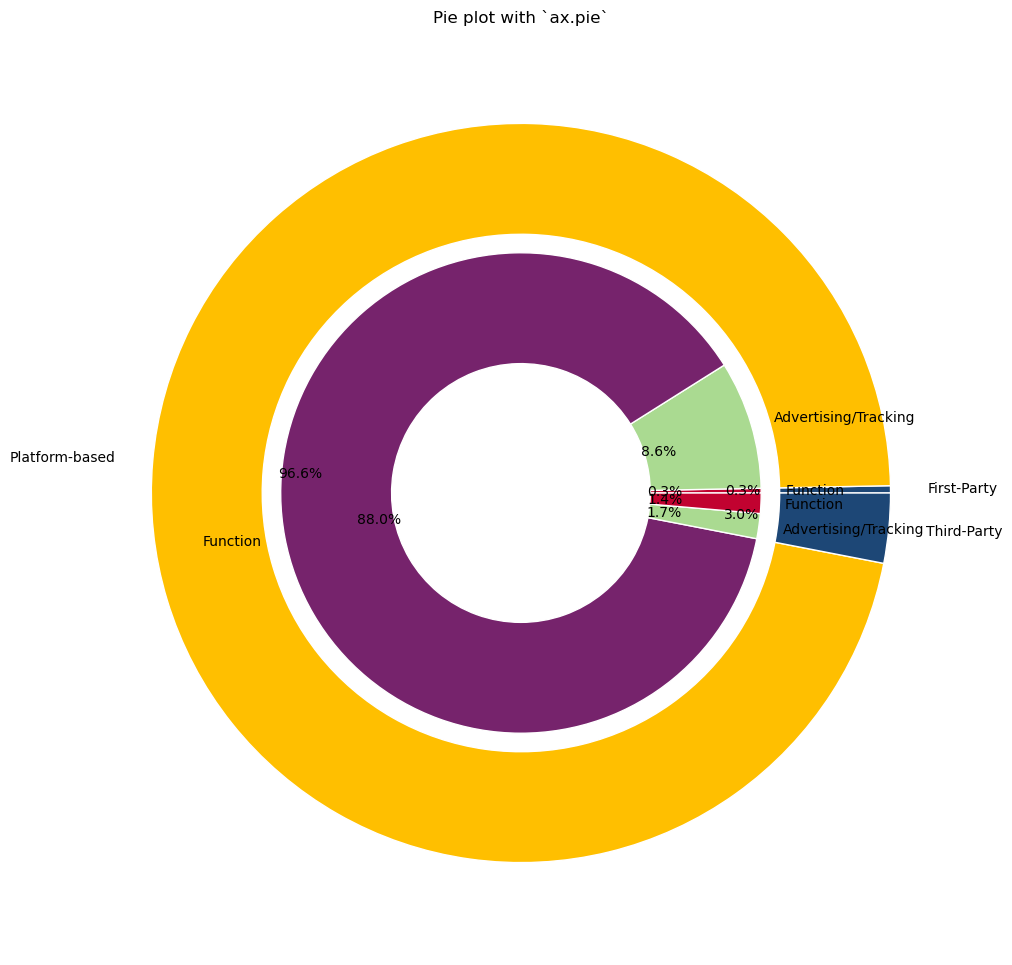

In [62]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(24,12))
size = 0.3



ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       colors=["#1D4776", "#FFBF00"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=0.65, 
       labels = inner_labels,
       autopct='%1.1f%%',
       colors=["#C10230", "#AADA91", "#76236C", "#AADA91"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.savefig("pie.png")
plt.show()

In [12]:
df

,Function,Advertising/Tracking
First Party,0.31,0.00
Third Party,1.36,1.68
Platfor based,88.00,8.62


In [16]:
df_fqdn = df.loc[df['Party'] == 'Platform-based', 'FQDN']
platform_base = {}
for fqdn in df_fqdn:
    if fqdn not in platform_base:
        platform_base[fqdn] = 1
    else:
        platform_base[fqdn] += 1
fqdn_skill_num_sorted = dict(sorted(platform_base.items(), key=lambda kv: kv[1], reverse=True))

In [17]:
fqdn_skill_num_sorted

{'avs-alexa-14-na.amazon.com': 446,
 'mlis.amazon.com': 377,
 'prod.amcs-tachyon.com': 305,
 'api.amazonalexa.com': 173,
 'd3p8zr0ffa9t17.cloudfront.net': 129,
 'device-metrics-us-2.amazon.com': 123,
 's3.amazonaws.com': 36,
 'acsechocaptiveportal.com': 27,
 'fireoscaptiveportal.com': 20,
 'ntp-g7g.amazon.com': 20,
 'api.amazon.com': 15,
 'tinytts.amazon.com': 14,
 'spectrum.s3.amazonaws.com': 10,
 'd37b6sgey2y8gt.cloudfront.net': 8,
 'msh.amazon.com': 7,
 'ingestion.us-east-1.prod.arteries.alexa.a2z.com': 7,
 'dss-na.amazon.com': 6,
 'device-artifacts-v2.s3.amazonaws.com': 5,
 'softwareupdates.amazon.com': 4,
 'dxz5jxhrrzigf.cloudfront.net': 3,
 'd29r7idq0wxsiz.cloudfront.net': 2,
 'music.amazon.com': 2,
 'det-ta-g7g.amazon.com': 2,
 'ffs-provisioner-config.amazon-dss.com': 2,
 'dcape-na.amazon.com': 2,
 'd3b28lu8h5txed.cloudfront.net': 2,
 's3.eu-west-2.amazonaws.com': 1,
 'd37bvzh6941o03.cloudfront.net': 1,
 'd28756ok3q8pa.cloudfront.net': 1}

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


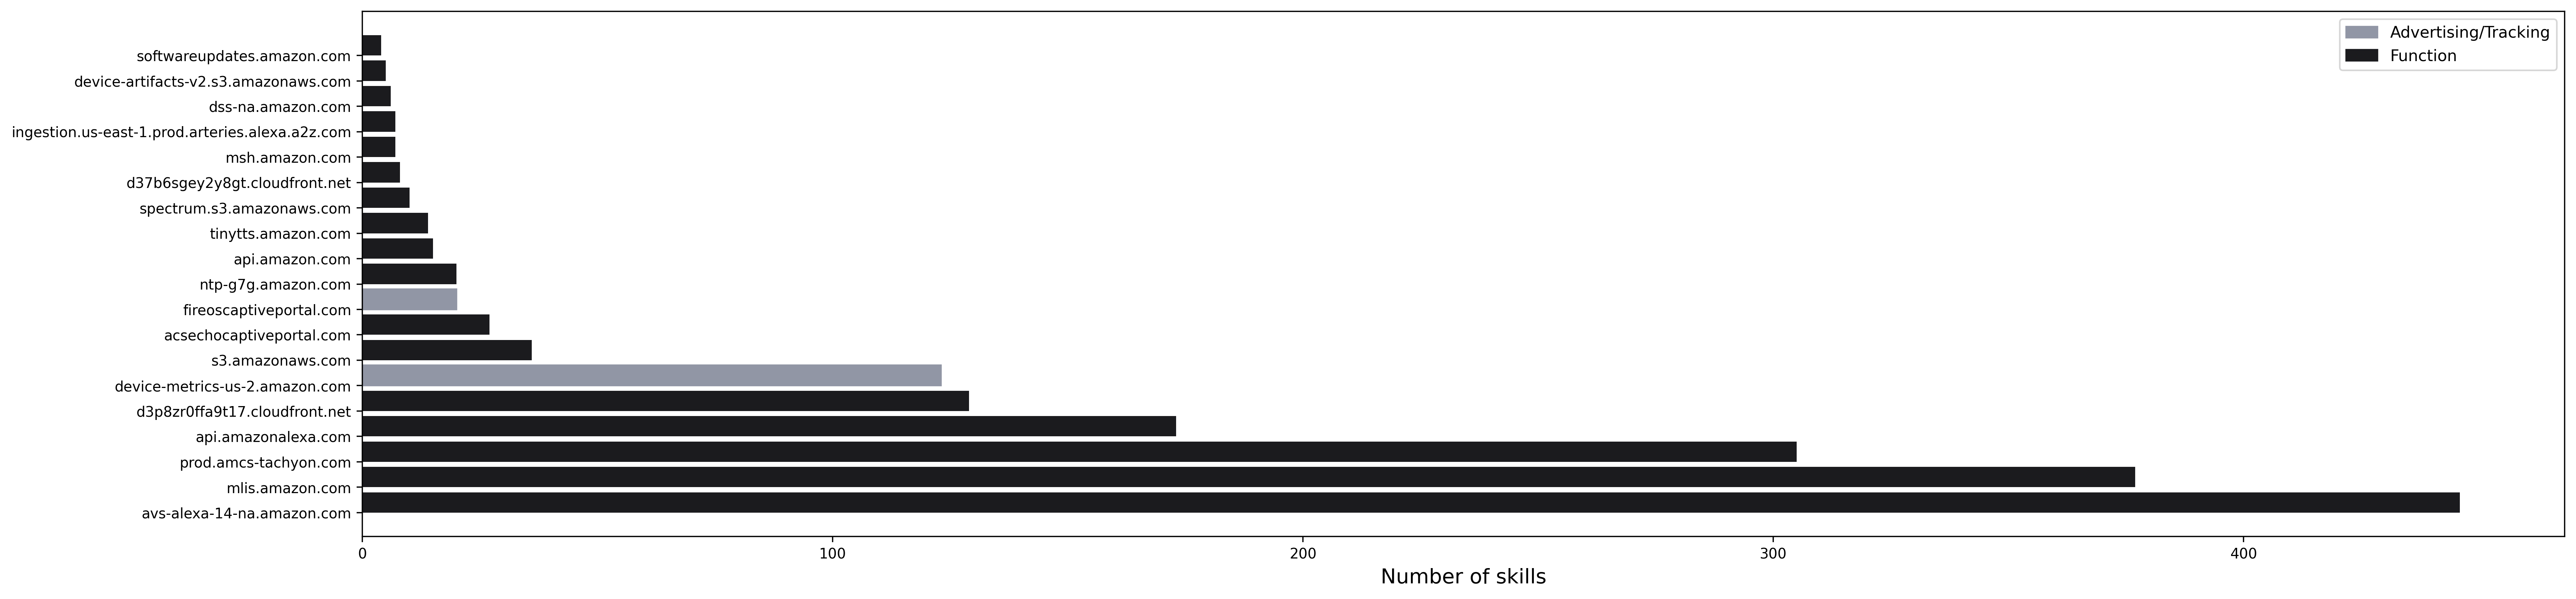

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(25, 6), dpi=320)

# Example data
N = 19
fqdns = [fqdn for fqdn, skills_nums in fqdn_skill_num_sorted.items()][:N]
y_pos = np.arange(0,N,1)
performance = [skills_nums for fqdn, skills_nums in fqdn_skill_num_sorted.items()][:N]
#error = np.random.rand(len(fqdns))

bar_list = ax.barh(y_pos, performance, align='edge', color = '#1B1B1E')

dict_fqdns = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/dict_fqdns_0307.json")
for i, fqdn in enumerate(fqdns):
    if dict_fqdns[fqdn]["ATSes"] == 'Advertising/Tracking':
        bar_list[i].set_color('#9196a5')
        
ax.set_yticks(y_pos)
ax.set_yticklabels(fqdns)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of skills', size=13, fontname="Times New Roman Bold")
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
#ax.set_title('Paltform_based FQDNs accessed by skills')
colors = {'Function' : '#1B1B1E', 'Advertising/Tracking': '#9196a5'}
labels = ['Advertising/Tracking', 'Function']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig('platform_barchart.pdf')
plt.show()


In [19]:
df_fqdn_non = df.loc[df['Party'] == 'Third-Party', 'FQDN']
non_platform_base = {}
for fqdn in df_fqdn_non:
    if fqdn not in non_platform_base:
        non_platform_base[fqdn] = 1
    else:
        non_platform_base[fqdn] += 1
fqdn_skill_num_sorted_non = dict(sorted(non_platform_base.items(), key=lambda kv: kv[1], reverse=True))

In [20]:
fqdn_skill_num_sorted_non

{'dillilabs.com': 9,
 'cdn2.voiceapps.com': 7,
 'play.podtrac.com': 6,
 'traffic.megaphone.fm': 6,
 'dcs.megaphone.fm': 3,
 'chtbl.com': 3,
 '1432239411.rsc.cdn77.org': 3,
 'edge1.pod.npr.org': 2,
 'edge2.pod.npr.org': 2,
 'traffic.libsyn.com': 2,
 'discovery.meethue.com': 2,
 'traffic.omny.fm': 1,
 'dts.podtrac.com': 1,
 'turnernetworksales.mc.tritondigital.com': 1,
 'content.libsyn.com': 1,
 'playerservices.streamtheworld.com': 1,
 '22113.live.streamtheworld.com': 1,
 '16613.live.streamtheworld.com': 1}

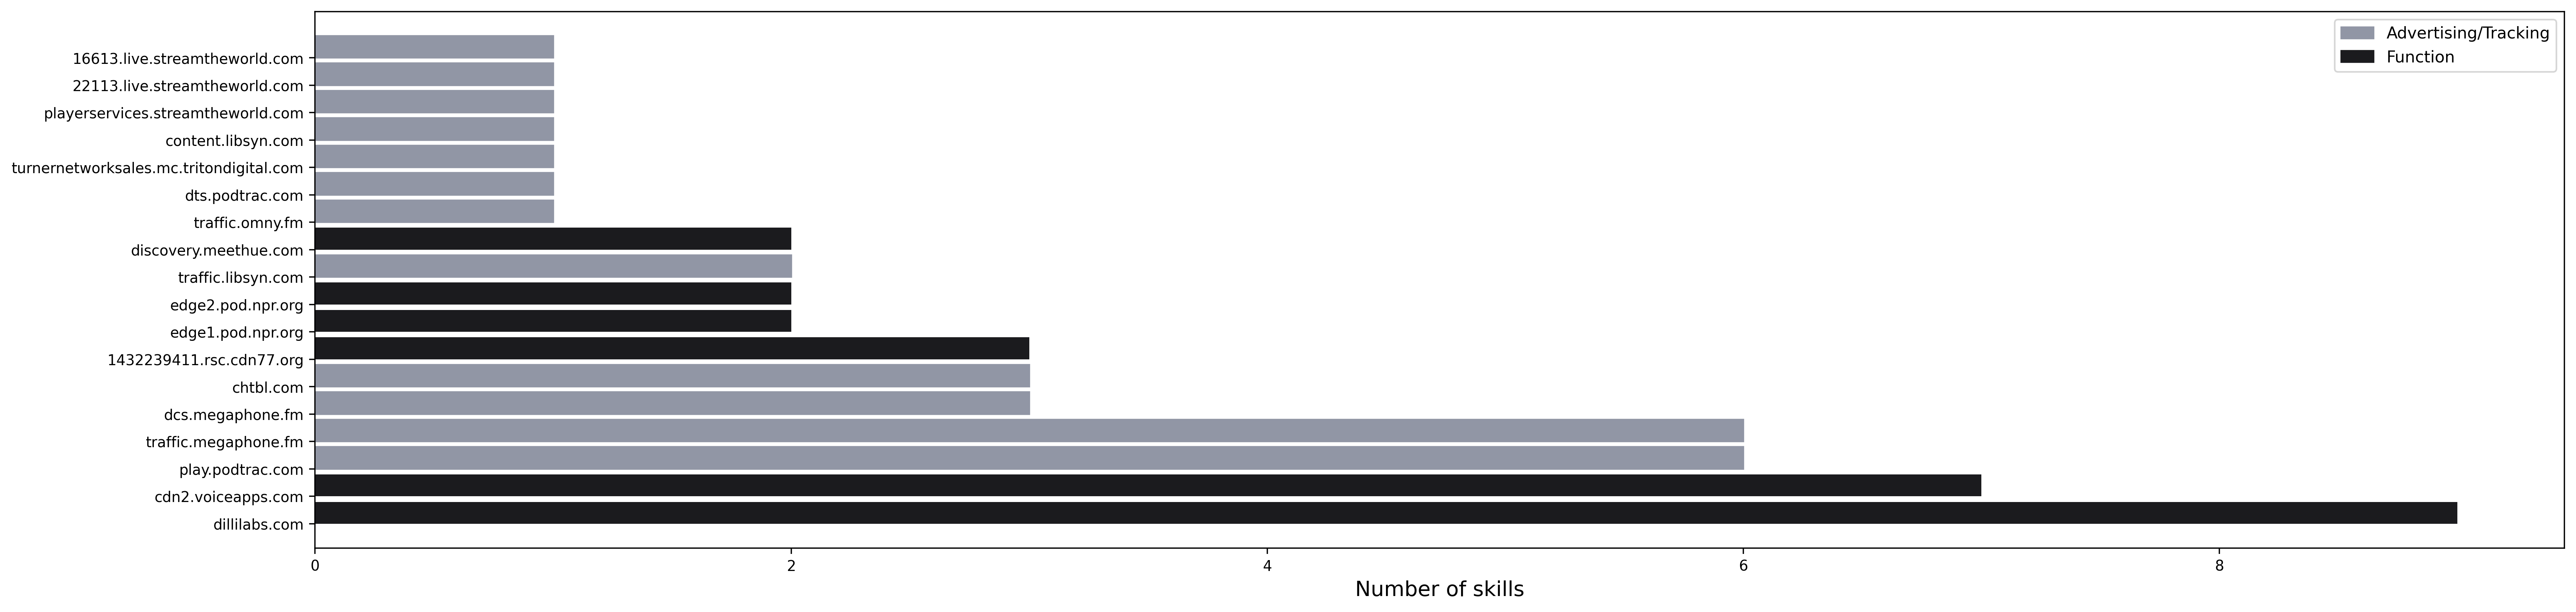

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(25, 6), dpi=320)

# Example data
fqdns = [fqdn for fqdn, skills_nums in fqdn_skill_num_sorted_non.items()]
y_pos = np.arange(0,len(fqdn_skill_num_sorted_non),1)
performance = [skills_nums for fqdn, skills_nums in fqdn_skill_num_sorted_non.items()]
#error = np.random.rand(len(fqdns))
#
bar_list = ax.barh(y_pos, performance, align='edge', color='#1B1B1E')

dict_fqdns = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/dict_fqdns_0307.json")
for i, fqdn in enumerate(fqdns):
    if dict_fqdns[fqdn]["ATSes"] == 'Advertising/Tracking':
        bar_list[i].set_color('#9196a5')
            
ax.set_yticks(y_pos)
ax.set_yticklabels(fqdns)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of skills', size=13, fontname="Times New Roman Bold")
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
colors = {'Function' : '#1B1B1E', 'Advertising/Tracking': '#9196a5'}
labels = ['Advertising/Tracking', 'Function']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
#ax.set_title('Top-30 domains accessed by skills')
plt.savefig('thirdparty_barchart.pdf')
plt.show()

In [14]:
df

,cat,skill_name,fqdn,domain_name,SLD,subdomain,organization,ATSes,Party
0,Fashion-Style,B083PY1PGZ,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based
1,Fashion-Style,B083PY1PGZ,ec2-54-166-14-123.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-54-166-14-123.compute-1,"Amazon Technologies, Inc.",others,Platform-based
2,Fashion-Style,B087YM4KJK,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based
3,Fashion-Style,B087YM4KJK,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based
4,Fashion-Style,B087YM4KJK,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based
...,...,...,...,...,...,...,...,...,...
2600,Health-Fitness,B07PJWHYXM,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",others,Platform-based
2601,Health-Fitness,B07PJWHYXM,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based
2602,Health-Fitness,B07PJWHYXM,ec2-34-198-99-173.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-34-198-99-173.compute-1,"Amazon Technologies, Inc.",others,Platform-based
2603,Health-Fitness,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based


In [15]:
df['count']=1
df

,cat,skill_name,fqdn,domain_name,SLD,subdomain,organization,ATSes,Party,count
0,Fashion-Style,B083PY1PGZ,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based,1
1,Fashion-Style,B083PY1PGZ,ec2-54-166-14-123.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-54-166-14-123.compute-1,"Amazon Technologies, Inc.",others,Platform-based,1
2,Fashion-Style,B087YM4KJK,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based,1
3,Fashion-Style,B087YM4KJK,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based,1
4,Fashion-Style,B087YM4KJK,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based,1
...,...,...,...,...,...,...,...,...,...,...
2600,Health-Fitness,B07PJWHYXM,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",others,Platform-based,1
2601,Health-Fitness,B07PJWHYXM,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based,1
2602,Health-Fitness,B07PJWHYXM,ec2-34-198-99-173.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-34-198-99-173.compute-1,"Amazon Technologies, Inc.",others,Platform-based,1
2603,Health-Fitness,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based,1


In [16]:
categories = ['cat', 'domain_name', 'organization', 'ATSes']
df[categories].values

array([['Fashion-Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Fashion-Style', 'amazonaws.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Fashion-Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'others'],
       ...,
       ['Health-Fitness', 'amazonaws.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Health-Fitness', 'amazon.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Health-Fitness', 'cloudfront.net', 'Amazon Technologies, Inc.',
        'others']], dtype=object)

In [30]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

categories = ['cat', 'domain_name', 'organization', 'ATSes']

newDf = pd.DataFrame()
for i in range(len(categories)-1):
    tempDf = df[[categories[i],categories[i+1],'count']]
    tempDf.columns = ['source','target','count']
    newDf = pd.concat([newDf,tempDf])    
newDf = newDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()


label_list = list(np.unique(df[categories].values.astype('str')))
source = newDf['source'].apply(lambda x: label_list.index(x))
target = newDf['target'].apply(lambda x: label_list.index(x))
count = newDf['count']

fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list, "color" : "black"},
    link = {"source": source, "target": target, "value": count}
    )])

fig.show()

<Figure size 640x480 with 0 Axes>